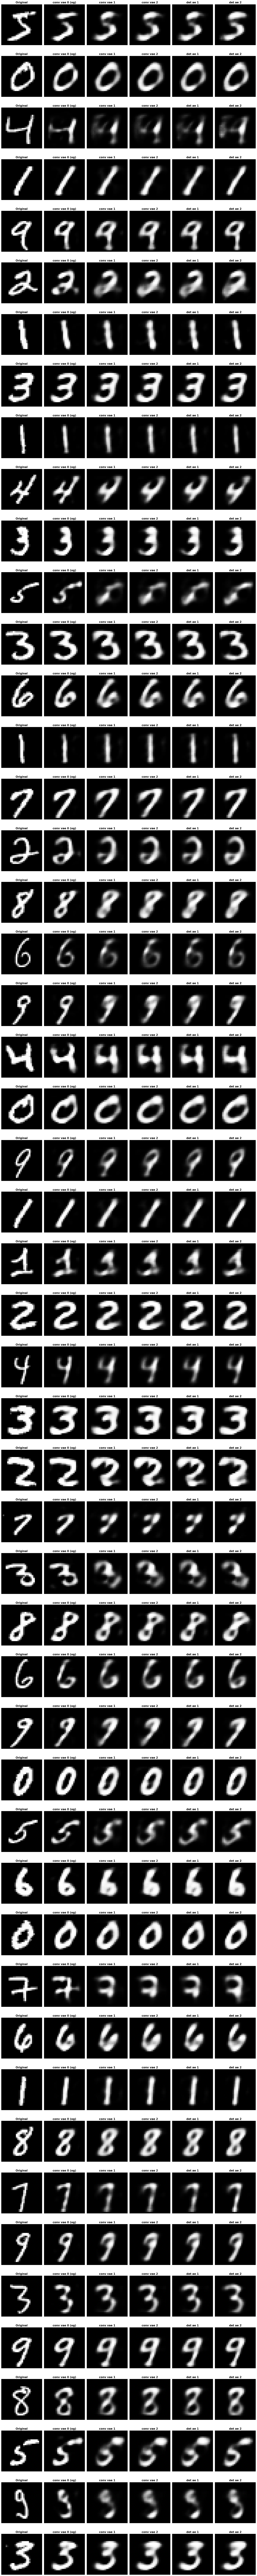

In [1]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

from functions import ExtractOuts
import matplotlib.pyplot as plt
import os

transform = transforms.Compose([transforms.ToTensor()])
test_dataset  = MNIST('../../Local Data Files/MNIST', transform=transform, download=True);
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False);

num_images = 50  # Number of images to process
model_names = [
    'conv vae 0 (og)', 
    'conv vae 1',
    'conv vae 2',
    'det ae 1',
    'det ae 2'
]

plt.figure(figsize=(20, 4*num_images))
plot_number = 1
for image_index in range(num_images): # starts at 0 and ends at 9
    '''(notes for myself:)
    image_index = 0 --> plot_number = 1, 2, 3, 4, 5, 6
    image_index = 1 --> plot_number = 7, 8, 9, 10, 11, 12
    image_index = 2 --> plot_number = 13, 14, 15, 16, 17, 18
    etc
    '''
    print(f'Generating Row {image_index+1}/{num_images}', end='\r')

    # Plot original image
    with ExtractOuts(model_names[0], test_loader, num_images) as (images, _):
        plt.subplot(num_images, len(model_names) + 1, plot_number)
        plt.imshow(images[image_index].view(28, 28), cmap='gray')
        plt.title('Original', fontsize=15, fontweight='bold')
        plt.axis('off')

    # Plot reconstructed images for each model
    for i, model_path in enumerate(model_names, 1):
        with ExtractOuts(model_path, test_loader, num_images) as (_, recon_images):
            plt.subplot(num_images, len(model_names) + 1, plot_number+i)
            plt.imshow(recon_images[image_index].view(28, 28), cmap='gray')
            plt.title(model_path, fontsize=15, fontweight='bold')
            plt.axis('off')
    
    plot_number += (len(model_names) + 1)

plt.tight_layout()
plt.show()